> Sabendo que na verdade existem mais de 300 indicadores, comente sobre qual estratégia você desenharia para resolver esse problema, falando sobre os principais desafios ou dúvidas envolvidos

## Desafios:

1. Cada indicador possui uma série temporal diferente, como demonstrado no painel do PowerBi. Isso significa que cada indicador deverá ter seu modelo de previsão. Ou um modelo adaptável a diferentes séries temporais.

2. A frequência das observações variam de indicador para indicador, tornando o dado heterogêneo.

3. Alta dimensionalidade dos dados. 

## Estratégia de solução 

1. Arrumar os dados. Pivotar a tabela fornecida da seguinte forma:

In [1]:
import pandas as pd

dados = pd.read_csv('dados/case_cientistaiii.csv')
dados_pivotados = dados.pivot_table(index=['dt_referencia'],
                                  columns='des_indicador', 
                                  values='valor')

dados_pivotados.head()

des_indicador,Derivados de leite,Ferramentas,Frutas,Gases,Grãos,Importações Europa,Máquinas agrícolas,Plásticos,Sementes,Índice Geral
dt_referencia,,,,,,,,,,
2015-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.745319,NaN,NaN
2015-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.813744,NaN,NaN
2015-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.637225,NaN,NaN
2015-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.974218,NaN,NaN
2015-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.276742,NaN,NaN


E então decidir como trabalhar com os dados faltantes. Eliminar as linhas onde possui dados faltantes ou imputar valor 0 para eles, por exemplo. 

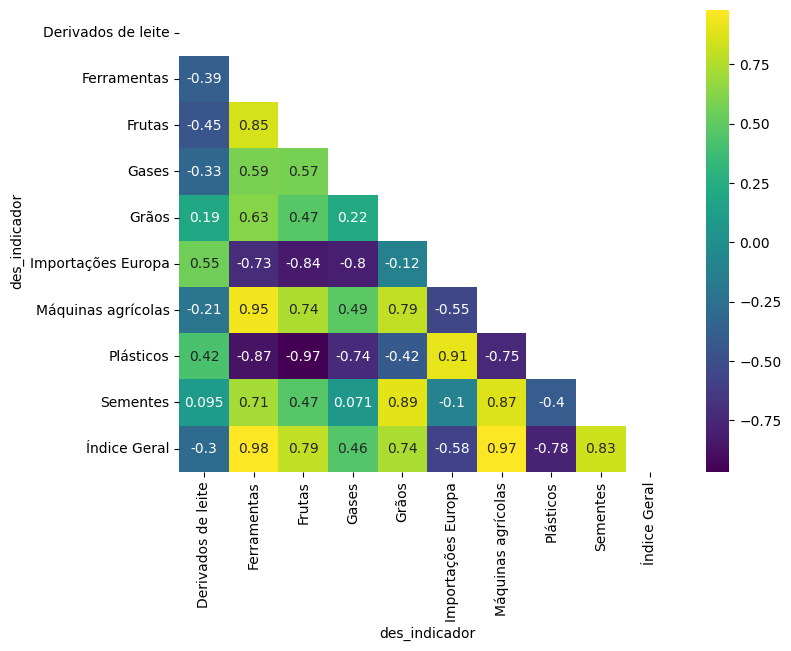

In [3]:
# Análise extra -> Inserindo 0:

def heatmap_corr(df, figsize: tuple = (8, 6)):
    import seaborn as sns
    import numpy as np
    import matplotlib.pyplot as plt
    
    corr = df.corr()
    
    mask = np.triu(np.ones_like(corr, dtype=bool))
    plt.figure(figsize=figsize)

    ax = sns.heatmap(corr,
                xticklabels=corr.columns.values,
                yticklabels=corr.columns.values,
                annot=True,
                cmap='viridis',
                mask=mask)
    
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    
dados_pivotados.fillna(0, inplace=True)

heatmap_corr(dados_pivotados.corr())

### Modelos

1. Criar diversos modelos especificos para cada serie temporal, um para cada indicador.

2. Usar modelos baseados em machine learning tendo como entrada os dados de outros indicadores. 

### Arquitetura

1. Criação e automação de um pipeline onde cada modelo é treinado e ajudado para cada indicador de forma separada. AutoML (PyCaret por exemplo) pode ser uma ótima saída.

2. Usar ferramentas de processamento em lote, como PySpark, que permite paralelizar essas tarefas de treinamento para executar o treinamento dos mais de 300 indicadores de forma simultânea.

### Avaliar os modelos 

Usando as métricas já conhecidas como RMSE, R2.

## Dúvidas

1. Quais são os maiores desafios operacionais enfrentados atualmente na previsão desses indicadores?


2. Como serão usados os resultado dessas previsões?